In [59]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import cv2 as cv
import os

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.decomposition import PCA

import sys
sys.path.append('./Do_s_python_utils')
from resize_imgs import *
from flatten_imgs_np_array import *

## resizing segmented files. 

In [60]:
seg_benign_path = 'C:\\Users\\dohyu\\Documents\\Homework\\stat_542_hw\\stat_542_group\\Segmented\\benign'
seg_malignant_path = 'C:\\Users\\dohyu\\Documents\\Homework\\stat_542_hw\\stat_542_group\\Segmented\\malignant'
seg_benign_path_28 = 'C:\\Users\\dohyu\\Documents\\Homework\\stat_542_hw\\stat_542_group\\Segmented_28\\benign'
seg_malignant_path_28 = 'C:\\Users\\dohyu\\Documents\\Homework\\stat_542_hw\\stat_542_group\\Segmented_28\\malignant'
resize_imgs(seg_benign_path, seg_benign_path_28, (28,28))
resize_imgs(seg_malignant_path, seg_malignant_path_28, (28,28))

## X and y (flattened and splitted)

In [61]:
seg_path_28 = 'C:\\Users\\dohyu\\Documents\\Homework\\stat_542_hw\\stat_542_group\\Segmented_28'
X, y = flatten_imgs_np_array(seg_path_28)
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [62]:
def perf_summary(model, y_test, y_pred, X, y, cv):
    score = cross_val_score(model, X, y, cv = cv, n_jobs = -1 )
    avg_acc = np.mean(score)
    std_acc = np.std(score)
    print('********************* Model Performance Summary *********************\n\n')
    print('***** Cross Validation using {} folds *****\nMean Accuracy: {}\nSTD: {}'.format(cv, avg_acc, std_acc))
    
    print('\n***** Confusion Matrix *****\n{}'.format(confusion_matrix(y_test,y_pred)))
    print('\n***** Classification Report *****\n{}'.format(classification_report(y_test,y_pred)))
    print('\n***** Classification Accuracy *****\n{}'.format(accuracy_score(y_test,y_pred)))
    print('\n**********************************************************************')

    
def grid_scv(X_train, y_train):
    param_grids = {'kernel': ['linear', 'poly'],
              'C':[1,2,3,4,5,6,6,7,8,9,10]}

    svc_clf = SVC(gamma = 'auto', cache_size = 7000)
    grid_svc = GridSearchCV(svc_clf, param_grids, n_jobs = -1, verbose = 1)
    grid_svc.fit(X_train, y_train)
    return(grid_svc.best_estimator_)

def grid_rf(X_train,y_train):
    n_estimators = [100,500]
    max_depth = [None, 5, 10]
    min_samples_split = [2, 5]
    min_samples_leaf = [1, 2, 4]
    param_grids = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    randf_clf = RF(n_jobs = -1)
    grid_RF = GridSearchCV(randf_clf,param_grids, n_jobs = -1, verbose = 1)
    grid_RF.fit(X_train, y_train)
    return(grid_RF.best_estimator_)

### Training logistic with L1 Penalty

In [63]:
lr_clf = LR(penalty = 'l1', solver = 'liblinear')
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
perf_summary(lr_clf, y_test,y_pred, X, y, cv = 10)

********************* Model Performance Summary *********************


***** Cross Validation using 10 folds *****
Mean Accuracy: 0.6133333333333334
STD: 0.08589399151150083

***** Confusion Matrix *****
[[22  7]
 [18 13]]

***** Classification Report *****
              precision    recall  f1-score   support

           0       0.55      0.76      0.64        29
           1       0.65      0.42      0.51        31

    accuracy                           0.58        60
   macro avg       0.60      0.59      0.57        60
weighted avg       0.60      0.58      0.57        60


***** Classification Accuracy *****
0.5833333333333334

**********************************************************************


### Training SVC

In [64]:
svc_clf = grid_scv(X_train, y_train)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
perf_summary(svc_clf, y_test,y_pred, X, y, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 22 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:   25.7s finished


********************* Model Performance Summary *********************


***** Cross Validation using 10 folds *****
Mean Accuracy: 0.5466666666666666
STD: 0.0669991708074726

***** Confusion Matrix *****
[[19 10]
 [13 18]]

***** Classification Report *****
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        29
           1       0.64      0.58      0.61        31

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.62        60
weighted avg       0.62      0.62      0.62        60


***** Classification Accuracy *****
0.6166666666666667

**********************************************************************


### Training Random Forest

In [65]:
RF_clf = grid_rf(X_train, y_train)
RF_clf.fit(X_train,y_train)
y_pred = RF_clf.predict(X_test)
perf_summary(RF_clf, y_test,y_pred, X, y, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


********************* Model Performance Summary *********************


***** Cross Validation using 10 folds *****
Mean Accuracy: 0.6833333333333333
STD: 0.09803627446568497

***** Confusion Matrix *****
[[21  8]
 [11 20]]

***** Classification Report *****
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        29
           1       0.71      0.65      0.68        31

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.69      0.68      0.68        60


***** Classification Accuracy *****
0.6833333333333333

**********************************************************************


### Building Models With Principal Components

In [66]:
pca = PCA(300)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

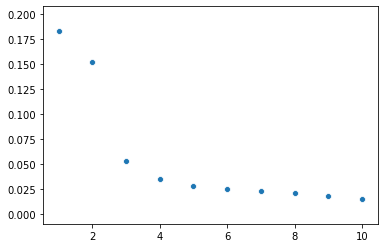

In [67]:
stop = 10
sns.scatterplot(x = np.linspace(start =1, stop = stop, num = stop),y=pca.explained_variance_ratio_[0:stop])

In [68]:
pca = PCA(5)
pca.fit(X)
X_pca = pca.transform(X)


In [69]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test=train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

### Logistic Regression with L1 Penalty

In [70]:
lr_pca_clf = LR(penalty = 'l1', solver = 'liblinear')
lr_pca_clf.fit(X_pca_train, y_pca_train)
y_pca_pred = lr_pca_clf.predict(X_pca_test)
perf_summary(lr_pca_clf, y_pca_test,y_pca_pred, X_pca, y, cv = 10)

********************* Model Performance Summary *********************


***** Cross Validation using 10 folds *****
Mean Accuracy: 0.6666666666666667
STD: 0.09428090415820635

***** Confusion Matrix *****
[[24  5]
 [18 13]]

***** Classification Report *****
              precision    recall  f1-score   support

           0       0.57      0.83      0.68        29
           1       0.72      0.42      0.53        31

    accuracy                           0.62        60
   macro avg       0.65      0.62      0.60        60
weighted avg       0.65      0.62      0.60        60


***** Classification Accuracy *****
0.6166666666666667

**********************************************************************


### SVC with PCA

In [71]:
svc_pca_clf = grid_scv(X_pca_train, y_pca_train)
svc_pca_clf.fit(X_pca_train, y_pca_train)
y_pca_pred = svc_pca_clf.predict(X_pca_test)
perf_summary(svc_pca_clf, y_pca_test,y_pca_pred, X_pca, y, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 22 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:   19.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


********************* Model Performance Summary *********************


***** Cross Validation using 10 folds *****
Mean Accuracy: 0.6533333333333333
STD: 0.08192137151629673

***** Confusion Matrix *****
[[25  4]
 [18 13]]

***** Classification Report *****
              precision    recall  f1-score   support

           0       0.58      0.86      0.69        29
           1       0.76      0.42      0.54        31

    accuracy                           0.63        60
   macro avg       0.67      0.64      0.62        60
weighted avg       0.68      0.63      0.62        60


***** Classification Accuracy *****
0.6333333333333333

**********************************************************************


### Random Forest with PCA

In [72]:
RF_pca_clf = grid_rf(X_pca_train, y_pca_train)
RF_pca_clf.fit(X_pca_train,y_pca_train)
y_pca_pred = RF_pca_clf.predict(X_pca_test)
perf_summary(RF_pca_clf, y_pca_test,y_pca_pred, X_pca, y, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


********************* Model Performance Summary *********************


***** Cross Validation using 10 folds *****
Mean Accuracy: 0.6266666666666667
STD: 0.06289320754704401

***** Confusion Matrix *****
[[22  7]
 [17 14]]

***** Classification Report *****
              precision    recall  f1-score   support

           0       0.56      0.76      0.65        29
           1       0.67      0.45      0.54        31

    accuracy                           0.60        60
   macro avg       0.62      0.61      0.59        60
weighted avg       0.62      0.60      0.59        60


***** Classification Accuracy *****
0.6

**********************************************************************
